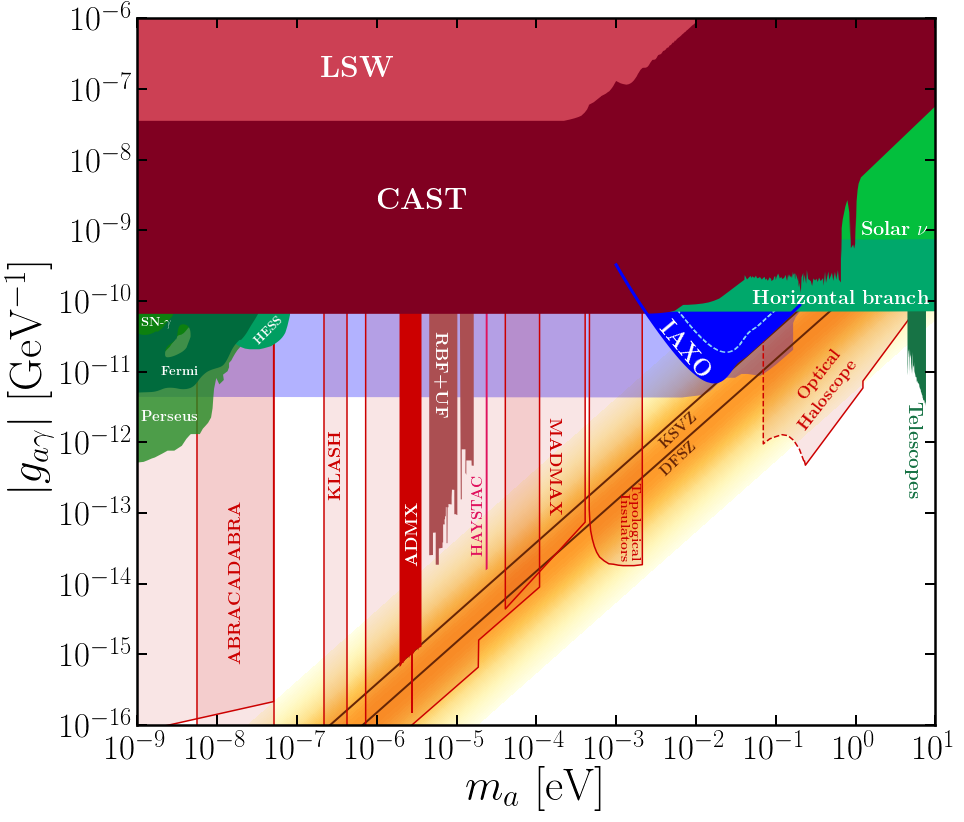

In [7]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import norm
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(14.3,13))
ax = fig.add_subplot(111)

# Axes limits on coupling (g) and mass (m)
g_min = 1.0e-16
g_max = 1.0e-6
m_min = 1.0e-9
m_max = 10.0



#######################################################################################################################
## QCD Axion band:
# Mass-coupling relation
# g_agamma in GeV^-1 and m_a in eV
def g_ag(C_ag,m_a):
    return 2e-10*C_ag*m_a

# Shaded QCD axion band
n = 200
g = logspace(log10(g_min),log10(g_max),n)
m = logspace(log10(m_min),log10(m_max),n)
QCD = zeros(shape=(n,n))
for i in range(0,n):
    QCD[:,i] = norm.pdf(log10(g)-log10(g_ag(0.75,m[i])),0.0,0.8)                 
cols = cm.get_cmap('YlOrBr') 
cols.set_under('w') # Set lowest color to white
plt.contourf(m, g, QCD, 50,cmap=cols,edgecolor=None,vmin=0.1,vmax=0.9,zorder=0)
plt.contourf(m, g, QCD, 50,cmap=cols,edgecolor=None,vmin=0.1,vmax=0.9,zorder=0)
plt.contourf(m, g, QCD, 50,cmap=cols,edgecolor=None,vmin=0.1,vmax=0.9,zorder=0)


KSVZ = g_ag(1.92,m) # KSVZ Axion |C_agamma| = 1.92
DFSZ = g_ag(0.75,m) # DSFZ Axion |C_agamma| = 0.75
plt.plot(m,KSVZ,'-',linewidth=2,color=cols(1.0),zorder=0)
plt.plot(m,DFSZ,'-',linewidth=2,color=cols(1.0),zorder=0)
plt.text(3.3e-3,   2e-12 ,r'{\bf KSVZ}',fontsize=15,rotation=43,color=cols(1.0))
plt.text(3.3e-3,   0.8e-12,r'{\bf DFSZ}',fontsize=15,rotation=43,color=cols(1.0))


######################################################################################################################
## Haloscopes
# UF Phys. Rev. D42, 1297 (1990).
# RBF Phys. Rev. Lett. 59, 839 (1987).
RBF_col = [0.67, 0.31, 0.32]
RBF = loadtxt("../limit_data/RBF_UF_Haloscopes.txt") 
plt.fill_between(RBF[:,0],RBF[:,1],y2=g[-1],edgecolor=None,facecolor=RBF_col,zorder=0.1)
plt.text(0.5e-5,2.5e-11,r'{\bf RBF+UF}',fontsize=18,color='w',rotation=-90)

# ADMX arXiv[1804.05750]
ADMX_col = [0.8, 0.0, 0.0]
ADMX = loadtxt("../limit_data/ADMX.txt") 
plt.fill_between(ADMX[:,0],ADMX[:,1],y2=g[-1],edgecolor=None,facecolor=ADMX_col,zorder=0.1)
ADMX = loadtxt("../limit_data/ADMX2017.txt") 
plt.fill_between(ADMX[:,0],ADMX[:,1],y2=g[-1],edgecolor=None,facecolor=ADMX_col,zorder=0.1)
plt.text(2.3e-6,1e-13,r'{\bf ADMX}',fontsize=18,color='w',rotation=90)

# HAYSTAC arXiv:[1803.03690]
HAYSTAC_col= [0.88, 0.07, 0.37]
HAYSTAC = loadtxt("../limit_data/HAYSTAC.txt") 
plt.fill_between(HAYSTAC[:,0],HAYSTAC[:,1],y2=g[-1],edgecolor=None,facecolor=HAYSTAC_col,zorder=0.1)
plt.text(1.6e-5,2.5e-13,r'{\bf HAYSTAC}',fontsize=15,color=HAYSTAC_col,rotation=90)


######################################################################################################################
# Projected Limits:
# IAXO arXiv[1212.4633]
IAXO_col = "Blue"
IAXO = loadtxt("../limit_data/IAXO.txt")
plt.text(3e-3,3.5e-11,r'{\bf IAXO}',fontsize=23,color='w',rotation=-50)
plt.fill_between(IAXO[:,0],IAXO[:,1],y2=g[-1],edgecolor=None,facecolor=IAXO_col,zorder=0,alpha=0.3)


DL = loadtxt("../my_data/MassDiscoveryLimit_Photon.txt")
plt.plot(DL[0,:],DL[1,:],'-',linewidth=3,color=IAXO_col,zorder=2)
plt.fill_between(DL[0,:],DL[1,:],y2=g[-1],edgecolor=None,facecolor=IAXO_col,zorder=0.1)

DL = loadtxt("../my_data/MassDiscoveryLimit_babyIAXO.txt")
plt.plot(DL[0,:],DL[1,:],'--',linewidth=1.5,zorder=0.1,color="lightskyblue")

# ADMX arXiv[1804.05750]
ADMX_Projected = loadtxt("../limit_data/ADMX_Projected.txt")
plt.plot(ADMX_Projected[:,0],ADMX_Projected[:,1],'-',linewidth=1.5,color=ADMX_col,zorder=0)
plt.fill_between(ADMX_Projected[:,0],ADMX_Projected[:,1],y2=g[-1],edgecolor=None,facecolor=ADMX_col,zorder=0,alpha=0.1)

# MADMAX arXiv:[1712.01062]
MADMAX = loadtxt("../limit_data/MADMAX.txt")
plt.plot(MADMAX[:,0],MADMAX[:,1],'-',linewidth=1.5,color=ADMX_col,zorder=0)
plt.fill_between(MADMAX[:,0],MADMAX[:,1],y2=g[-1],edgecolor=None,facecolor=ADMX_col,zorder=0,alpha=0.1)
plt.text(1.3e-4,1.5e-12,r'{\bf MADMAX}',rotation=-90,fontsize=18,color=ADMX_col)


# ABRACADABRA arXiv[1602.01086]
ABRA1 = loadtxt("../limit_data/ABRACADABRA_Broadband.txt")
ABRA2 = loadtxt("../limit_data/ABRACADABRA_Resonant.txt")
plt.plot(ABRA1[:,0],ABRA1[:,1],'-',linewidth=1.5,color=ADMX_col,zorder=0)
plt.plot(ABRA2[:,0],ABRA2[:,1],'-',linewidth=1.5,color=ADMX_col,zorder=0)
plt.fill_between(ABRA2[:,0],ABRA2[:,1],y2=g[-1],edgecolor=None,facecolor=ADMX_col,zorder=0,alpha=0.1)
plt.fill_between(ABRA1[:,0],ABRA1[:,1],y2=g[-1],edgecolor=None,facecolor=ADMX_col,zorder=0,alpha=0.1)
plt.text(1.4e-8,1e-13,r'{\bf ABRACADABRA}',rotation=90,fontsize=18,color=ADMX_col)

# TOORAD arXiv[1807.08810]
TOORAD = loadtxt("../limit_data/TOORAD.txt")
plt.plot(TOORAD[:,0],TOORAD[:,1],'-',linewidth=1.5,color=ADMX_col,zorder=0)
plt.fill_between(TOORAD[:,0],TOORAD[:,1],y2=g[-1],facecolor=ADMX_col,zorder=0,alpha=0.1)
plt.text(1.4e-3,0.2e-12,r'{\bf Topological}',rotation=-90,fontsize=14,color=ADMX_col)
plt.text(1.04e-3,0.14e-12,r'{\bf Insulators}',rotation=-90,fontsize=14,color=ADMX_col)

# KLASH arXiv:[1707.06010]
KLASH = loadtxt("../limit_data/KLASH.txt")
plt.plot(KLASH[:,0],KLASH[:,1],'-',linewidth=1.5,color=ADMX_col,zorder=0)
plt.fill_between(KLASH[:,0],KLASH[:,1],y2=g[-1],facecolor=ADMX_col,zorder=0,alpha=0.1)
plt.text(2.5e-7,1e-12,r'{\bf KLASH}',rotation=90,fontsize=18,color=ADMX_col)

# Optical Haloscope arXiv:[1803.11455]
L1 = loadtxt("../limit_data/OpticalHaloscope_Phase2.txt",delimiter=',')
L2 = loadtxt("../limit_data/OpticalHaloscope_Phase2_extended.txt",delimiter=',')
LAMPPOST = vstack((L1,L2))
plt.plot(L1[:,0],L1[:,1],'-',linewidth=1.5,color=ADMX_col,zorder=0)
plt.plot(L2[:,0],L2[:,1],'--',linewidth=1.5,color=ADMX_col,zorder=0)
plt.fill_between(LAMPPOST[:,0],LAMPPOST[:,1],y2=g[-1],facecolor=ADMX_col,zorder=0,alpha=0.1)
plt.text(1.8e-1,1.6e-11,r'{\bf Optical}',rotation=52,fontsize=17,color=ADMX_col)
plt.text(1.8e-1,1.1e-11,r'{\bf Haloscope}',rotation=52,fontsize=17,color=ADMX_col)

#######################################################################################################################
### Astrophysical constraints

# Perseus
Perseus_col = "ForestGreen"
Perseus = loadtxt("../limit_data/Perseus-gammarays.txt")
plt.fill_between(Perseus[:,0],Perseus[:,1],y2=g[-1],edgecolor=None,facecolor=Perseus_col,zorder=0.2,alpha=0.8)
plt.text(1.1e-9,2e-12,r'{\bf Perseus}',fontsize=15,color='w')


# SN-gamma rays arXiv:[1410.3747]
SNgamma_col = [0.05, 0.5, 0.06]
SNgamma = loadtxt("../limit_data/SN-gamma.txt")
plt.fill_between(SNgamma[:,0],SNgamma[:,1],y2=g[-1],edgecolor=None,facecolor=SNgamma_col,zorder=0.2)
plt.text(1.1e-9,4.5e-11,r'{\bf SN}-$\gamma$',fontsize=13,color='w')

# HESS arXiv:[1304.0700]
HESS_col = [0.0, 0.62, 0.38]
HESS = loadtxt("../limit_data/HESS.txt")
plt.fill_between(HESS[:,0],HESS[:,1],y2=g[-1],edgecolor=None,facecolor=HESS_col,zorder=0.2)
plt.text(2.8e-8,4.9e-11,r'{\bf HESS}',fontsize=12,color='w',zorder=1,rotation=45)

# Fermi NGC1275 arXiv:[1603.06978]
Fermi_col = [0.0, 0.42, 0.24]
Fermi1 = loadtxt("../limit_data/Fermi1.txt")
Fermi2 = loadtxt("../limit_data/Fermi2.txt")
plt.fill_between(Fermi1[:,0],Fermi1[:,1],y2=g[-1],edgecolor=None,facecolor=Fermi_col,zorder=0.2)
plt.fill(Fermi2[:,0],1.05*Fermi2[:,1],edgecolor=None,facecolor=Fermi_col)
plt.text(2e-9,0.9e-11,r'{\bf Fermi}',fontsize=13,color='w')

# Optical telescope [astro-ph/0611502]
Telescopes_col = [0.09, 0.45, 0.27]
Telescopes = loadtxt("../limit_data/Telescopes.txt")
plt.fill_between(Telescopes[:,0],Telescopes[:,1],y2=g[-1],edgecolor=None,facecolor=Telescopes_col,zorder=0.2)
plt.text(4,2.5e-12,r'{\bf Telescopes}',fontsize=19,color=Telescopes_col,rotation=-90)



######################################################################################################################
# Stellar physics constraints
# Globular clusters arXiv:[1406.6053]
HB_col = [0.0, 0.66, 0.42]
HB = loadtxt("../limit_data/HorizontalBranch.txt")
plt.fill_between(HB[:,0],HB[:,1],y2=g[-1],edgecolor=None,facecolor=HB_col,zorder=1)
plt.text(0.5e-1,0.9e-10,r'{\bf Horizontal branch}',fontsize=20,color='w')

# Solar neutrino B8 bound arXiv:[1501.01639]
SolarNu_col = [0.01, 0.75, 0.24]
SolarNu = loadtxt("../limit_data/SolarNu.txt")
plt.fill_between(SolarNu[:,0],SolarNu[:,1],y2=g[-1],edgecolor=None,facecolor=SolarNu_col,zorder=1)
plt.text(1.2e0,0.85e-9,r'{\bf Solar} $\nu$',fontsize=20,color='w')

######################################################################################################################
# LABORATORY
# CAST arXiv:[1705.02290]
CAST_col = [0.5, 0.0, 0.13]
CAST = loadtxt("../limit_data/CAST.txt") 
CAST17 = loadtxt("../limit_data/CAST_2017.txt") 
plt.fill_between(CAST[:,0],CAST[:,1],y2=g[-1],edgecolor=None,facecolor=CAST_col,zorder=1.5)
plt.fill_between(CAST17[:,0],CAST17[:,1],y2=g[-1],edgecolor=None,facecolor=CAST_col,zorder=1.5)
plt.text(1e-6,2e-9,r'{\bf CAST}',fontsize=30,color='w')

# ALPS-I arXiv:[1004.1313]
ALPS_col = [0.8, 0.25, 0.33]
ALPS = loadtxt("../limit_data/ALPS.txt") 
plt.fill_between(ALPS[:,0],ALPS[:,1],y2=g[-1],edgecolor=None,facecolor=ALPS_col,zorder=1.5)

# OSQAR arXiv:[1506.08082]
OSQAR = loadtxt("../limit_data/OSQAR.txt") 
plt.fill_between(OSQAR[:,0],OSQAR[:,1],y2=g[-1],edgecolor=None,facecolor=ALPS_col,zorder=1.5)

# PVLAS [1510.08052]
PVLAS = loadtxt("../limit_data/PVLAS.txt") 
plt.fill_between(PVLAS[:,0],PVLAS[:,1],y2=g[-1],edgecolor=None,facecolor=ALPS_col,zorder=1.5)
plt.text(2e-7,1.5e-7,r'{\bf LSW}',fontsize=30,color='w')


######################################################################################################################
# Labels
plt.xlabel(r"$m_a$ [eV]",fontsize=45)
plt.ylabel(r"$|g_{a\gamma}|$ [GeV$^{-1}$]",fontsize=45)

# Limits
ax.set_xlim(left=m[0], right=m[-1])
ax.set_ylim(bottom=g[0], top=g[-1])

# Style
plt.xscale('log')
plt.yscale('log')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
xtx = power(10.0,arange(log10(m_min),log10(m_max)+1,1.0))
ytx = power(10.0,arange(log10(g_min),log10(g_max)+1,1.0))
ax.set_xticks(xtx)
ax.set_yticks(ytx)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax.tick_params(axis='x', which='major', pad=10)

# Show and save
plt.show()
fig.savefig('../plots/AxionLimits.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/AxionLimits.png',bbox_inches='tight')

In [54]:
eps_D = 0.8 
eps_T = 0.7
Bore_Diameter = 60.0 # cm
N_bores = 8
Length = 20.0
Exposure = 0.5*3
MagneticField = 2.5

S_cm = N_bores*pi*(Bore_Diameter/2.0)**2.0 # cm^2
L_eV = Length/1.97e-7 # eV^-1
t_secs = Exposure*3600*24*365 # s
B = MagneticField*(1e-19*195)
norm = 6.02e10*t_secs*S_cm*eps_D*eps_T*(B*L_eV/2.0)**2.0

normq = L_eV/(4*1000)
norm


220892.79026050313

In [44]:
S = pi*(60/2)**2*8/100**2 # m^2

2.261946710584651